In [7]:
import pandas as pd

df = pd.read_csv('../data/creditcard.csv/cleaned_creditcard.csv')
df.columns #notice how this is the new clean

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_scaled'],
      dtype='object')

Apply SMOTE

#Split the data into training and testing sets

In [20]:
#Input features = All columns except Class
#Target Variable = Class

X = df.drop(columns='Class')
y = df['Class']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(), "\n")
print(y_test.value_counts())

(226980, 31) (56746, 31)
Class
0    226602
1       378
Name: count, dtype: int64 

Class
0    56651
1       95
Name: count, dtype: int64


In [ ]:
#Now we want to apply SMOTE X_train and y_train
#This should add more training data to our x nd y train_resampled so that we have more data to train from since the data is imbalanced
#It generates new synthetic samples for the minority class only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_resampled.value_counts())


Class
0    226602
1       378
Name: count, dtype: int64
Class
0    226602
1    226602
Name: count, dtype: int64


Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Time_scaled'] = scaler.fit_transform(df[['Time']])



In [55]:
df.drop(columns=['Time'],inplace=True)


In [56]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Amount_scaled', 'Time_scaled'],
      dtype='object')

In [60]:
model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
model.fit(X_train_resampled,y_train_resampled)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, random_state=42, solver='saga')

In [61]:
y_pred = model.predict(X_test)

Now we want to Evaluate Predictions

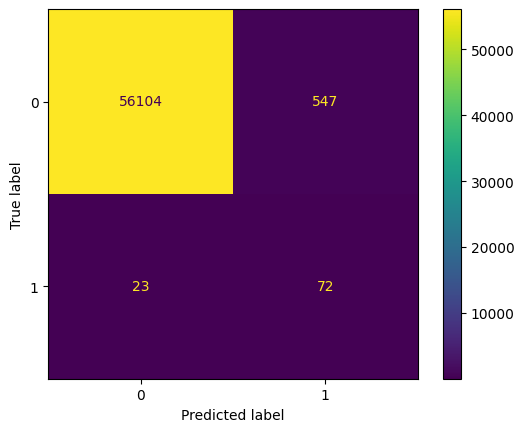

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.12      0.76      0.20        95

    accuracy                           0.99     56746
   macro avg       0.56      0.87      0.60     56746
weighted avg       1.00      0.99      0.99     56746



 Interpretation:
Recall = 0.76 ✅ → Your model caught 76% of frauds — this is strong for a baseline model!

Precision = 0.12 ⚠ → Of all the times the model said "fraud", only 12% were actually fraud
→ You’re getting lots of false alarms (FPs)

F1 = 0.20 → Balance between catching fraud and being correct when you say “fraud” is low

